In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
def load_dataset():
    mndata = MNIST("./python-mnist/data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [2]:
load_dataset()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [58]:
X_train, labels_train, X_test, labels_test = load_dataset()

In [60]:
print(X_train[0].shape)

(784,)


In [4]:
labels_train[0]

5

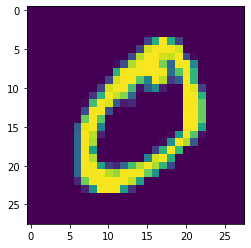

In [5]:
plt.imshow(X_train[1].reshape(28,28))

In [6]:
a = X_train.T.dot(X_train)


In [7]:
a.shape

(784, 784)

In [8]:
print(len(a))

784


In [9]:
labels_train.shape

(60000,)

In [10]:
Y = np.eye(10)
# print(Y)

Y = np.eye(10)[labels_train]
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print(Y.shape)

(60000, 10)


In [12]:
print(X_train.shape) # 784 x 784 x784x 60000 x 60000 x 10

(60000, 784)


In [13]:
X = X_train
X.T.dot(X).shape

(784, 784)

In [14]:
np.multiply(3, np.eye(784)).shape

(784, 784)

In [15]:
result = np.linalg.pinv(X.T.dot(X) + np.multiply(3, np.eye(784)))

In [31]:
print(len(X_train))

60000


In [17]:
result.dot(X.T).dot(Y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
np.multiply(reg_lambda, np.eye(784))

NameError: name 'reg_lambda' is not defined

In [19]:
reg_lambda = 1e-4
def train(X,X_labels, reg_lambda):
    # TODO: polyfeature + normalization?
    
    n = X.shape[1]
    Y = np.eye(10)[X_labels]
    w = np.linalg.pinv(X.T.dot(X) + np.multiply(reg_lambda, np.eye(n))  ).dot(X.T).dot(Y)
#     w = np.linalg.pinv(X.T.dot(X) + np.multiply(reg_lambda,np.eye(n)) ).dot(X.T).dot(Y)
    return w

w = train(X_train, labels_train, reg_lambda)

In [20]:
print(w.shape)

(784, 10)


In [53]:
def predict(w, x, p):
    n, d = x.shape
    h = np.zeros((n, p))
    G = np.random.normal(0, 1, size=(p, d))
    b = np.random.uniform(0, math.pi, size=(p,))
    for i in range(n):
        h[i, :] = np.cos(G.dot(x[i, :].T) + b)
    predictions = np.eye(10).T.dot(w.T).dot(h.T)
    return predictions

In [40]:
import math
def pFeature(X, p):
    n, d = X.shape

    n = X.shape[0]
    h = np.zeros((n, p))
    
#     print("p ", p)
#     print("d ", d)
    # TODO: try generate G, b for each sample
    G = np.random.normal(0, 1, size=(p, d))
    b = np.random.uniform(0, math.pi, size=(p,))
    for i in range(n):
#         print("G ", G.shape)
#         print("X[i,:].T ", X[i,:].T.shape)
        h[i, :] = np.cos(G.dot(X[i,:].T) + b)
    return h

In [ ]:
np.arange(100, 2100, 400)

In [45]:
def splitTrainValidation(X, X_labels):
    n = len(X)
    indices = np.random.permutation(n)
    print(n)
    training_idx_num = int(n* 0.8)
    training_idx, validation_idx = indices[:training_idx_num], indices[training_idx_num:]
    training_data = X[training_idx, :]
    training_labels = X_labels[training_idx]
    val_data = X[validation_idx, :]
    val_labels = X_labels[validation_idx]
    return training_data, training_labels, val_data, val_labels

In [25]:
def train(X, X_labels, reg_lambda=0):
    # TODO: polyfeature + normalization?

    n = X.shape[1]
    Y = np.eye(10)[X_labels]
    w = np.linalg.pinv(X.T.dot(X) + np.multiply(reg_lambda, np.eye(n))).dot(X.T).dot(Y)
    #     w = np.linalg.pinv(X.T.dot(X) + np.multiply(reg_lambda,np.eye(n)) ).dot(X.T).dot(Y)
    return w

In [39]:
pFeature(X_train, 100)

array([[ 0.52601604,  0.90359675,  0.08614315, ...,  0.78218901,
        -0.99887277,  0.39097043],
       [-0.46504257, -0.39310463, -0.97473106, ..., -0.66223582,
        -0.93916929,  0.30375045],
       [-0.98806852, -0.43208679,  0.26691498, ...,  0.11142287,
        -0.60686781, -0.65066036],
       ...,
       [ 0.53078623,  0.99189009, -0.97146959, ...,  0.07525966,
         0.82013441, -0.38162265],
       [ 0.17217737,  0.97068362,  0.99822636, ..., -0.96670607,
        -0.45325137, -0.7859005 ],
       [ 0.16804673,  0.9811033 ,  0.80841793, ...,  0.52788866,
         0.45215109,  0.9991888 ]])

In [ ]:
X_train, labels_train, X_test, labels_test = load_dataset()

In [55]:

ps = np.array([100])


train_errors = np.zeros(len(ps))
test_errors = np.zeros(len(ps))
idx = 0
reg_lambda = 1e-4

# for loop 
for p in ps:
    
    # feature transform
    X_train = pFeature(X_train, p)  # when transform features
    X_train, labels_train, X_val, val_labels = splitTrainValidation(X_train, labels_train)
    print((len(X_train)))
    w = train(X_train, labels_train, reg_lambda)
    prediction_train = predict(w, X_train, p)
    prediction_train = np.argmax(prediction_train, axis=0)
    train_errors[idx] = 1 - np.sum(labels_train == np.array(prediction_train)) / len(labels_train)
    print("Train error:  ", 1 - np.sum(labels_train == np.array(prediction_train)) / len(labels_train))
    prediction_test = predict(w, X_test, p)
    prediction_test = np.argmax(prediction_test, axis=0)
    test_errors[idx] = 1 - np.sum(labels_test == np.array(prediction_test)) / len(labels_test)
    print("Test error:   ", 1 - np.sum(labels_test == np.array(prediction_test)) / len(labels_test))
    idx += 1
    print("Training progress:  ", idx , "/", len(ps))

15728
12582
Train error:   0.897790494357018
Test error:    0.8989
Training progress:   1 / 1


In [71]:
def hoeffding( num_samples, num_correct, a= 0, b= 1, delta = 0.05):
    rhs = math.sqrt( (b-a)**2*math.log(2/delta, math.e)/(2* num_samples) )
    mu_conf_interval = (  -rhs+num_correct,  rhs+num_correct)
    return mu_conf_interval


hoeffding(100, 60)

(59.86418984842594, 60.13581015157406)